In [1]:
import pandas as pd
import csv
import os

myListDir=os.listdir()
folder=input("The name of your input folder without extension: ")
while not folder+".0" in myListDir: #extension 0 certainly exists, as we have at least one rank
    print(folder+": wrong name")
    folder=input("The name of your input folder, without extension: ")

os.chdir("./"+folder+".0") #extension 0 certainly exists, as we have at least one rank

with open("plotInfo.csv","r") as data:
    reader = csv.reader(data, delimiter = ',')
    for row in reader:
        fileNameRoot=row[0] #the names of the files contating the data start with...
        rankNum=int(row[1]) #we have file from different ranks, reported in different folders with name, for a specific
                            #rank: fileNameRoot+"."+str(rank)
        #ag0num=int(row[2])  #how many agents in each rank, with type==0

#current folders
print("Current folders are:")
for k in range(rankNum):
    print(folder+"."+str(k))

The name of your input folder without extension:  PlannerPropMax2Fail0.1


Current folders are:
PlannerPropMax2Fail0.1.0
PlannerPropMax2Fail0.1.1
PlannerPropMax2Fail0.1.2
PlannerPropMax2Fail0.1.3


In [2]:
#display all the rows of the dataframe  
pd.set_option('display.max_rows', None)

In [3]:
names=["production in Q", "active labor", "total labor", "active capital in Q","total capital in Q"]

In [4]:
os.chdir("../"+folder+".0")
#key info table database from rank==0
keyInfoTable=pd.read_csv('keyInfoTable.csv', header=None)

#key info table database from rank > 0
for k in range(1,rankNum):   #add the same series from the other folders (if ranknum==1, no execution
    #which folder
    os.chdir("../"+folder+"."+str(k))
    keyInfoTable=keyInfoTable.add(pd.read_csv('keyInfoTable.csv', header=None))
keyInfoTable.columns=names

In [5]:
keyInfoTable

,production in Q,active labor,total labor,active capital in Q,total capital in Q
0,12448.557466,25427.0,106267.0,117862.641166,1.223025e+06
1,18997.334789,38086.0,106267.0,178331.684344,1.223025e+06
2,20777.326142,41018.0,106267.0,195414.352348,1.223025e+06
3,22313.488422,44123.0,106267.0,213181.139187,1.223025e+06
4,23062.758126,45170.0,106267.0,219408.827424,1.223025e+06
5,23744.504739,46427.0,106267.0,226384.191343,1.223049e+06
6,25272.595350,48823.0,112464.0,239000.225402,1.223201e+06
7,27045.384154,52179.0,117328.0,255963.724318,1.222779e+06
8,28293.466813,54680.0,123257.0,268718.347612,1.222113e+06
9,29644.618917,57385.0,128715.0,281656.579574,1.221214e+06


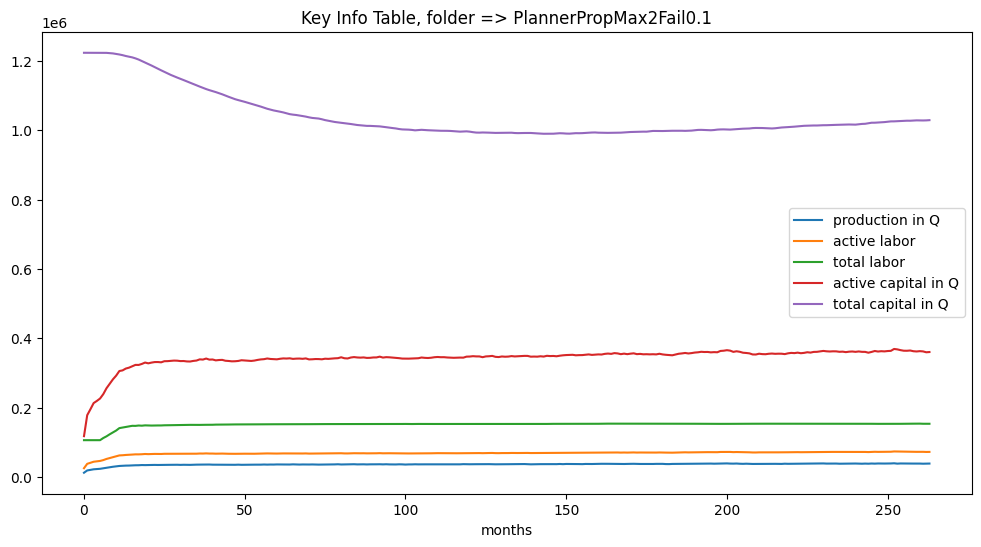

In [6]:
fig=keyInfoTable.plot(figsize=(12,6), title="Key Info Table, folder => " + folder,xlabel="months")
picture=fig.get_figure()
os.chdir("../"+folder+".0")
picture.savefig("_"+folder+"_keyInfoTable.jpg",dpi=180)

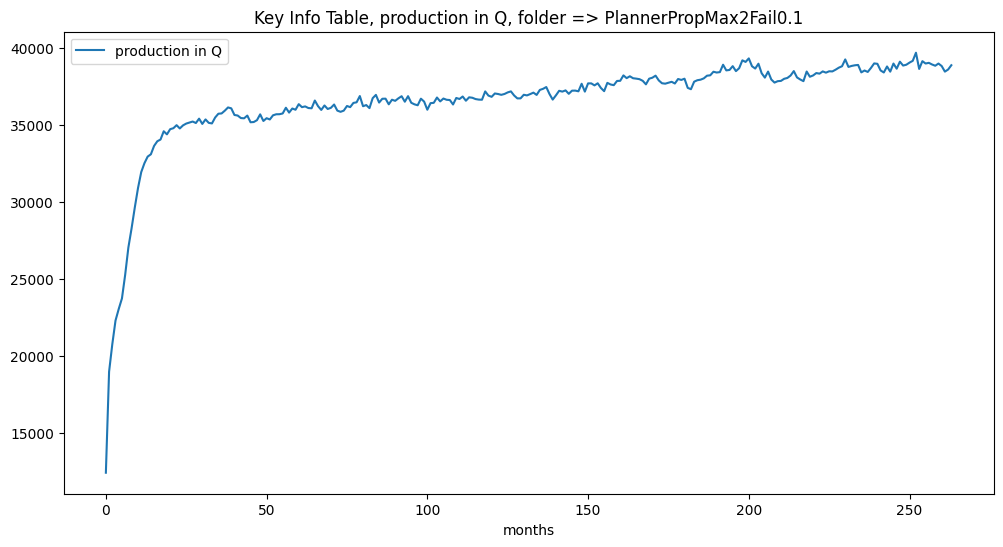

In [7]:
fig=keyInfoTable[["production in Q"]].plot(figsize=(12,6), title="Key Info Table, production in Q, folder => " + folder,\
                                           xlabel="months")
picture=fig.get_figure()
os.chdir("../"+folder+".0")
picture.savefig("_"+folder+"_keyInfoTableProductionQ.jpg",dpi=180)